# Random Walk

![title](random_walk_pic.png)

## TD State-Value Updates

$ V(S_t) = V(S_t) + \alpha [ R_{t+1} + \gamma V(S_{t+1}) - V(S_t) ] $

## MC State-Value Updates

$ V(S_t) = V(S_t) + \alpha [G_t - V(S_t)] $

# Load Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Random Walk Function

In [2]:
def random_walk(episodes=None, alpha=None):
    
    # Initialize TD and MC state-values
    state_values_td = np.array([0, 0.5, 0.5, 0.5, 0.5, 0.5, 0])
    state_values_mc = np.array([0, 0.5, 0.5, 0.5, 0.5, 0.5, 0])
    
    # Initialize error lists for each algorithm
    rmse_td = []
    rmse_mc = []

    for i in range(episodes):
    
        # Start random walk in middle at position C=3
        state = 3
    
        # List of positions visited
        positions = [3]
    
        # Loop until terminal state 1 or 7 is reached
        while ( (state!=0) & (state!=6) ):
        
            # Take a random step left or right
            next_state = state + np.random.choice([-1,1])
        
            # Temporal Difference Learning
            state_values_td[state] = state_values_td[state] + alpha* \
                ( rewards[next_state] + state_values_td[next_state] - state_values_td[state] )
        
            # Save all positions visited
            positions.append(next_state)
        
            # Update state
            state = next_state
        
        # TD rmse
        rmse_td.append( np.sqrt(np.mean((state_values_td[1:-1]-true_values)**2)) )
        
        # Find Unique Positions Visited
        unique_states = list(set(positions[:-1]))

        # Monte Carlo Learning
        for j in range(len(unique_states)):

            state_values_mc[unique_states[j]] = state_values_mc[unique_states[j]] + alpha* \
                ( rewards[state] - state_values_mc[unique_states[j]] )
        
        # MC rmse
        rmse_mc.append( np.sqrt(np.mean((state_values_mc[1:-1]-true_values)**2)) )
            
    return state_values_td[1:-1], state_values_mc[1:-1], rmse_td, rmse_mc

# Random Walk with RL

In [3]:
# Set seed
np.random.seed(919)

# True state-values
true_values = np.array([1/6, 2/6, 3/6, 4/6, 5/6])

# Reward for each state
rewards = [0, 0, 0, 0, 0, 0, 1] 

# Small step size
alpha = 0.05

# Discount value
gamma = 1

# Number of random walk episodes
episodes = 100

In [4]:
# Take a stroll
state_values_td, state_values_mc, rmse_td, rmse_mc = random_walk(episodes, alpha)

# View Results

In [5]:
pd.DataFrame({"True Values":true_values, "TD Values":state_values_td, "MC Values":state_values_mc})

,True Values,TD Values,MC Values
0,0.166667,0.132634,0.148860
1,0.333333,0.357721,0.386575
2,0.500000,0.495352,0.595187
3,0.666667,0.699159,0.696237
4,0.833333,0.865053,0.887149


In [6]:
print("The TD RMSE is", rmse_td[-1].round(4))
print("The MC RMSE is", rmse_mc[-1].round(4))

The TD RMSE is 0.0277
The MC RMSE is 0.0565


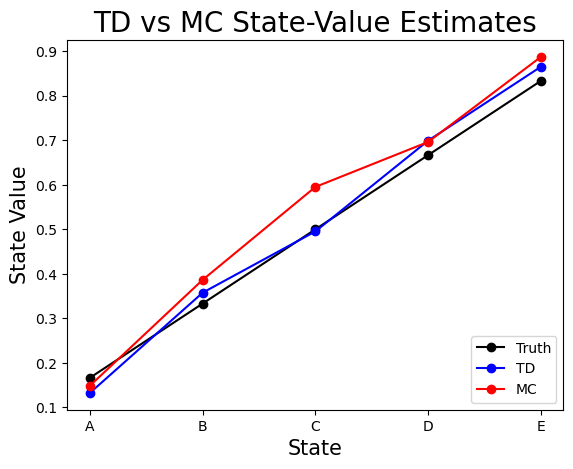

In [7]:
states = ["A","B","C","D","E"]
plt.plot(states, true_values, linestyle='solid', marker='o', label="Truth", color="black")
plt.plot(states, state_values_td, linestyle='solid', marker='o', label="TD", color="blue")
plt.plot(states, state_values_mc, linestyle='solid', marker='o', label="MC", color="red")
plt.title("TD vs MC State-Value Estimates", fontsize=20)
plt.xlabel("State", fontsize=15)
plt.ylabel("State Value", fontsize=15)
plt.legend(loc="lower right")
plt.show()

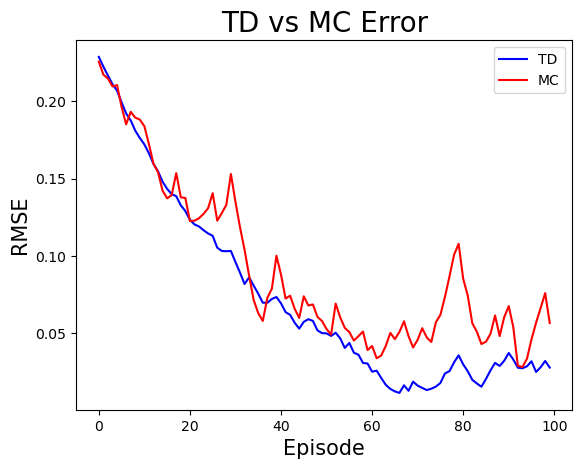

In [8]:
plt.plot(range(episodes), rmse_td, linestyle='solid', label="TD", color="blue")
plt.plot(range(episodes), rmse_mc, linestyle='solid', label="MC", color="red")
plt.title("TD vs MC Error", fontsize=20)
plt.xlabel("Episode", fontsize=15)
plt.ylabel("RMSE", fontsize=15)
plt.legend(loc="upper right")
plt.show()

# View Long Term Behavior

In [9]:
# Set seed
np.random.seed(919)

# True state-values
true_values = np.array([1/6, 2/6, 3/6, 4/6, 5/6])

# Reward for each state
rewards = [0, 0, 0, 0, 0, 0, 1] 

# Discount value
gamma = 1

# Number of random walk episodes
episodes = 100

# Number of random walk experiments
experiments = 100

# list of step sizes
alpha_set = [0.05, 0.10, 0.15]

In [10]:
# List for the average rmse for each episode across experiments
rmse_td_exp_alpha = []
rmse_mc_exp_alpha = []

# Run random walk experiment for different step sizes
for alpha in alpha_set:

    # Initialize lists to save rmse for each experiment
    rmse_td_exp = []
    rmse_mc_exp = []

    for k in range(experiments):
    
        # Conduct random walk
        state_values_td, state_values_mc, rmse_td, rmse_mc = random_walk(episodes, alpha)
    
        # Save rmse for all episodes of each experiment (experiments x episodes)
        rmse_td_exp.append(rmse_td)
        rmse_mc_exp.append(rmse_mc)

    # Calculate and save the average rmse for each episode across experiments
    rmse_td_exp_alpha.append( np.mean(np.array(rmse_td_exp), axis=0) )
    rmse_mc_exp_alpha.append( np.mean(np.array(rmse_mc_exp), axis=0) )

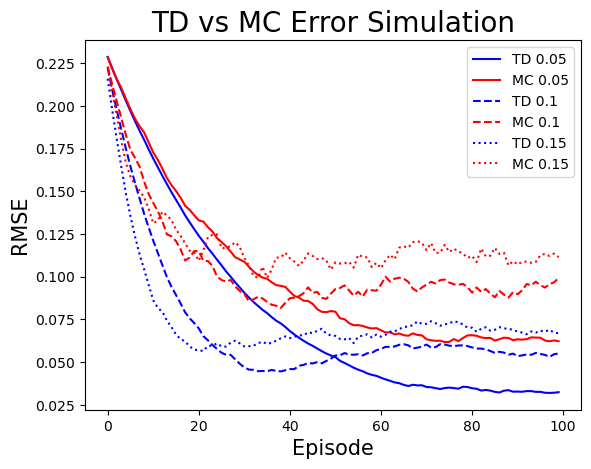

In [11]:
ls = ["solid","dashed","dotted"]
for i in range(len(alpha_set)):
    plt.plot(range(episodes), rmse_td_exp_alpha[i], linestyle=ls[i], label="TD "+str(alpha_set[i]), color="blue")
    plt.plot(range(episodes), rmse_mc_exp_alpha[i], linestyle=ls[i], label="MC "+str(alpha_set[i]), color="red")
    
plt.title("TD vs MC Error Simulation", fontsize=20)
plt.xlabel("Episode", fontsize=15)
plt.ylabel("RMSE", fontsize=15)
plt.legend(loc="upper right")
plt.show()

# Batch Updating

In [12]:
def random_walk_positions(episodes):
    
    # list of positions visited for each episode
    positions_list = []

    # Find positions for batch updating
    for i in range(episodes):
    
        # Start random walk in middle at position C=3
        state = 3
    
        # List of positions visited
        positions = [3]
    
        # Loop until terminal state 1 or 7 is reached
        while ( (state!=0) & (state!=6) ):
        
            # Take a random step left or right
            next_state = state + np.random.choice([-1,1])
        
            # Save all positions visited
            positions.append(next_state)
        
            # Update state
            state = next_state
    
        # Save positions of random walk for all episodes
        positions_list.append(positions)
        
    return positions_list

In [13]:
def random_walk_batch_updating(episodes, total_batches):
    
    # Initialize TD and MC state-values
    state_values_td = np.array([0, 0.5, 0.5, 0.5, 0.5, 0.5, 0])
    state_values_mc = np.array([0, 0.5, 0.5, 0.5, 0.5, 0.5, 0])

    # Sequence of episodes repeated
    batch = [x for x in range(episodes)]*total_batches

    # Get a batch of random walks
    positions_list = random_walk_positions(episodes)

    # Initialize error lists for each algorithm
    rmse_td = []
    rmse_mc = []

    for i in range(len(batch)):
    
        # Start random walk in middle at position C=3
        state = 3
    
        for j in range(len(positions_list[batch[i]])-1):
        
            # Identify next state
            next_state = positions_list[batch[i]][j+1]
        
            # Temporal Difference Learning
            state_values_td[state] = state_values_td[state] + alpha* \
                ( rewards[next_state] + state_values_td[next_state] - state_values_td[state] )
        
            # Update state
            state = next_state
        
        # TD rmse
        rmse_td.append( np.sqrt(np.mean((state_values_td[1:-1]-true_values)**2)) )
    
        # Find Unique Positions Visited
        unique_states = list(set(positions_list[batch[i]][:-1]))

        # Monte Carlo Learning
        for k in range(len(unique_states)):

            state_values_mc[unique_states[k]] = state_values_mc[unique_states[k]] + alpha* \
                ( rewards[state] - state_values_mc[unique_states[k]] )
        
        # MC rmse
        rmse_mc.append( np.sqrt(np.mean((state_values_mc[1:-1]-true_values)**2)) )
        
    return state_values_td[1:-1], state_values_mc[1:-1], rmse_td, rmse_mc

In [14]:
# Set seed
np.random.seed(314)

# True state-values
true_values = np.array([1/6, 2/6, 3/6, 4/6, 5/6])

# Reward for each state
rewards = [0, 0, 0, 0, 0, 0, 1] 

# Small step size
alpha = 0.05

# Number of random walk episodes
episodes = 10

# Number of times to repeat calculations with episodes
total_batches = 10

# Random walk in batch
state_values_td, state_values_mc, rmse_td, rmse_mc = random_walk_batch_updating(episodes,total_batches)

In [15]:
pd.DataFrame({"True Values":true_values, "TD Values":state_values_td, "MC Values":state_values_mc})

,True Values,TD Values,MC Values
0,0.166667,0.082022,0.013792
1,0.333333,0.174211,0.301109
2,0.500000,0.362830,0.301109
3,0.666667,0.529370,0.365569
4,0.833333,0.727251,0.591336


In [16]:
print("The TD RMSE is", rmse_td[-1].round(4))
print("The MC RMSE is", rmse_mc[-1].round(4))

The TD RMSE is 0.1276
The MC RMSE is 0.2065


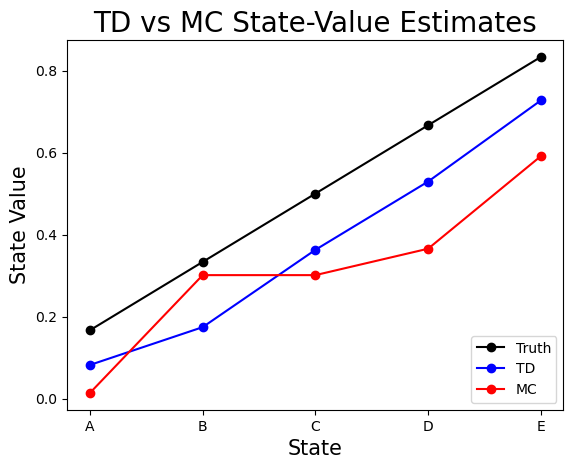

In [17]:
states = ["A","B","C","D","E"]
plt.plot(states, true_values, linestyle='solid', marker='o', label="Truth", color="black")
plt.plot(states, state_values_td, linestyle='solid', marker='o', label="TD", color="blue")
plt.plot(states, state_values_mc, linestyle='solid', marker='o', label="MC", color="red")
plt.title("TD vs MC State-Value Estimates", fontsize=20)
plt.xlabel("State", fontsize=15)
plt.ylabel("State Value", fontsize=15)
plt.legend(loc="lower right")
plt.show()

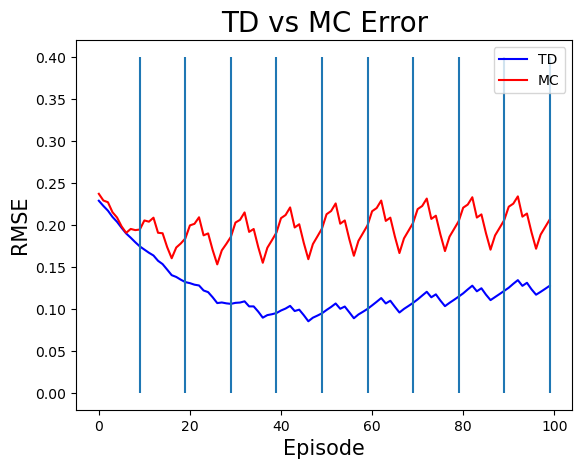

In [18]:
plt.plot(range(episodes*total_batches), rmse_td, linestyle='solid', label="TD", color="blue")
plt.plot(range(episodes*total_batches), rmse_mc, linestyle='solid', label="MC", color="red")
plt.title("TD vs MC Error", fontsize=20)
plt.xlabel("Episode", fontsize=15)
plt.ylabel("RMSE", fontsize=15)
plt.legend(loc="upper right")
for i in range(episodes):
    plt.vlines(i*10+9,ymin=0,ymax=0.40)
plt.show()

# Batch Updating in Simulation

In [19]:
# Set seed
np.random.seed(314)

# True state-values
true_values = np.array([1/6, 2/6, 3/6, 4/6, 5/6])

# Reward for each state
rewards = [0, 0, 0, 0, 0, 0, 1] 

# Small step size
alpha = 0.05

# Episodes per batch
episodes_set = [10, 25, 50]

# Number of batches for each episode set
batch_set = [10, 4, 2]

In [20]:
# List for the average rmse for each episode across experiments
rmse_td_exp_batch = []
rmse_mc_exp_batch = []

# Run random walk experiment for different step sizes
for epi_bat in range(len(batch_set)):

    # Initialize lists to save rmse for each experiment
    rmse_td_exp = []
    rmse_mc_exp = []

    for k in range(experiments):
    
        # Conduct random walk
        state_values_td, state_values_mc, rmse_td, rmse_mc = random_walk_batch_updating(episodes_set[epi_bat], batch_set[epi_bat])
    
        # Save rmse for all episodes of each experiment (experiments x episodes)
        rmse_td_exp.append(rmse_td)
        rmse_mc_exp.append(rmse_mc)

    # Calculate and save the average rmse for each episode across experiments
    rmse_td_exp_batch.append( np.mean(np.array(rmse_td_exp), axis=0) )
    rmse_mc_exp_batch.append( np.mean(np.array(rmse_mc_exp), axis=0) )

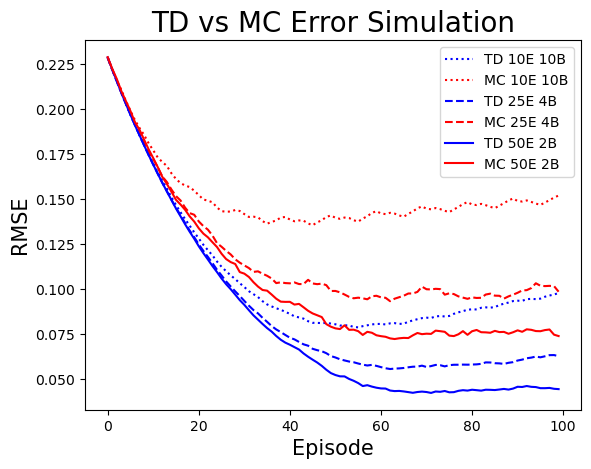

In [21]:
ls = ["dotted","dashed","solid"]
for i in range(len(batch_set)):
    plt.plot(range(episodes_set[0]*batch_set[0]), rmse_td_exp_batch[i], linestyle=ls[i], label="TD "+str(episodes_set[i])+"E "+str(batch_set[i])+"B", color="blue")
    plt.plot(range(episodes_set[0]*batch_set[0]), rmse_mc_exp_batch[i], linestyle=ls[i], label="MC "+str(episodes_set[i])+"E "+str(batch_set[i])+"B", color="red")
    
plt.title("TD vs MC Error Simulation", fontsize=20)
plt.xlabel("Episode", fontsize=15)
plt.ylabel("RMSE", fontsize=15)
plt.legend(loc="upper right")
plt.show()